## Plant Classifier

#### Importing Libraries

In [1]:
# Importing essential libraries for data manipulation and visualization
import joblib                      # For saving and loading machine learning models
import matplotlib.pyplot as plt    # For plotting and visualization
import numpy as np                 # For numerical operations
import pandas as pd                # For data manipulation and analysis
import seaborn as sns              # For advanced plotting and visualization
import warnings                    # To handle and suppress warnings

# Importing necessary modules from scikit-learn for machine learning tasks
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier  # Ensemble methods
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Evaluation metrics
from sklearn.model_selection import GridSearchCV, train_test_split  # Model selection tools
from sklearn.neighbors import KNeighborsClassifier  # k-Nearest Neighbors algorithm
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Preprocessing tools
from sklearn.svm import SVC  # Support Vector Machine algorithm
from sklearn.tree import DecisionTreeClassifier  # Decision Tree algorithm
from sklearn.ensemble import ExtraTreesClassifier # An extra-trees classifier.

# Suppressing all warnings for cleaner output
warnings.filterwarnings('ignore')

#### Data Preprocessing

##### 1.1 load the dataset:

In [2]:
# Load the dataset
dataset = "Dataset.xlsx" 
data = pd.read_excel(dataset)

##### 1.2 Handle missing values:

In [3]:
# Check for missing values
print(data.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
DFactor1           0
DFactor2           0
DFactor3           0
DFactor4           0
DFactor5           0
DFactor6           0
DFactor7           0
DFactor8           0
DFactor9           0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


##### 1.3 Check for duplicates:

In [4]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)

##### 1.4 Scale the numerical features:

In [5]:
# List of features in the dataset that need to be scaled
features_to_scale = ['Area', 'Perimeter', 'MajorAxisLength', 'DFactor1', 'DFactor2', 'DFactor3', 'DFactor4', 'DFactor5', 'DFactor6', 'DFactor7', 'DFactor8', 'DFactor9', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']

# Initializing the StandardScaler to scale the features
scaler = StandardScaler()

# Applying the scaler to the features in the dataset
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

##### 1.5 Encode the 'Class' column:

In [6]:
# Initializing the LabelEncoder to encode categorical labels into numerical values
le = LabelEncoder()

# Applying the LabelEncoder to the 'Class' column to convert categorical class labels into numerical labels
data['Class'] = le.fit_transform(data['Class'])

#### Data Visualization:

##### 2.1 Visualize the distribution of each feature:

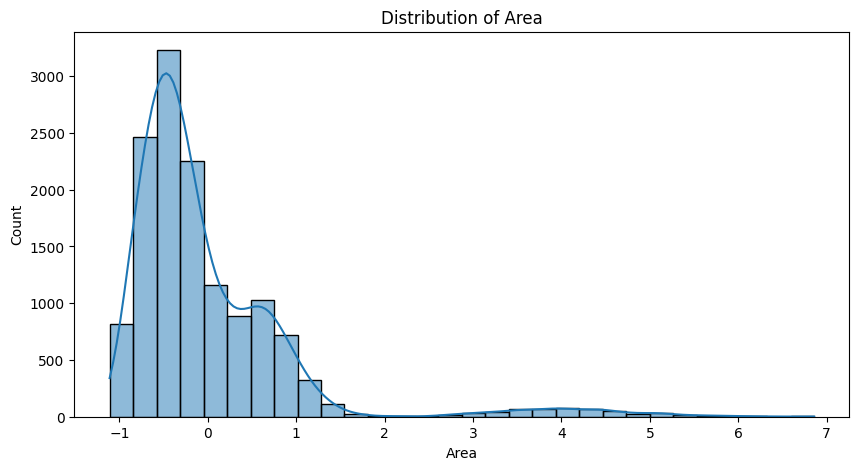

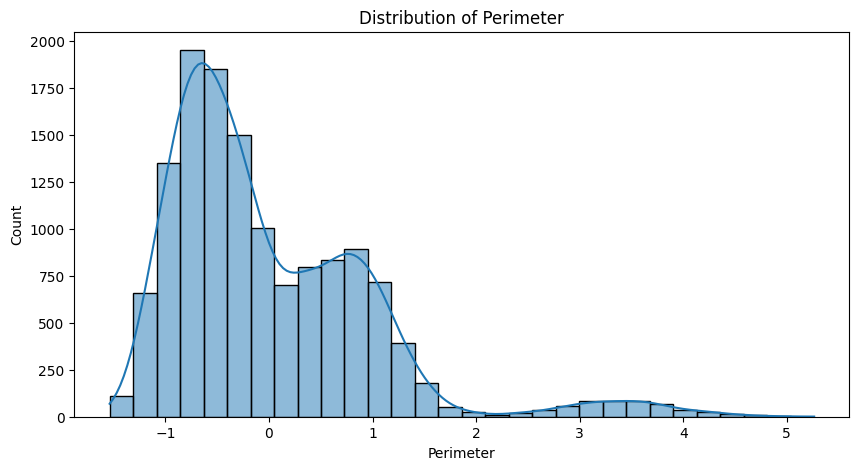

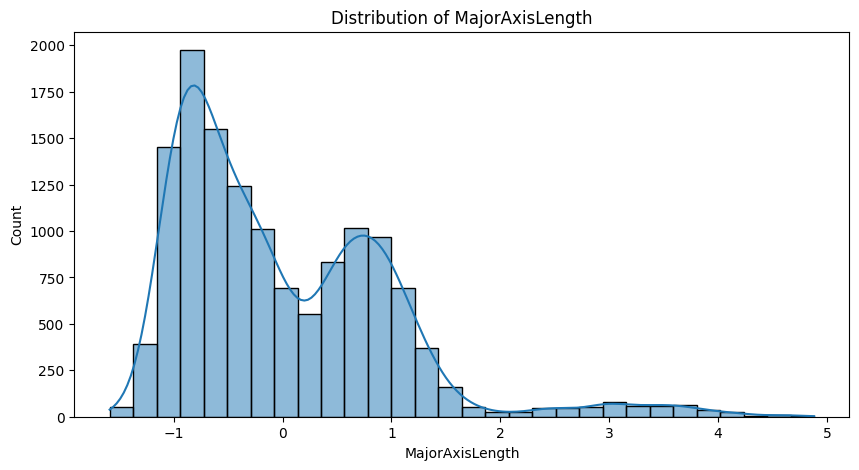

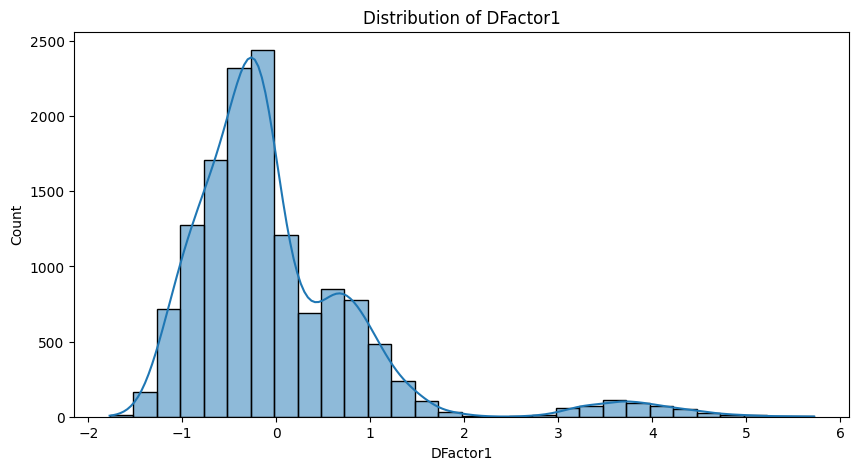

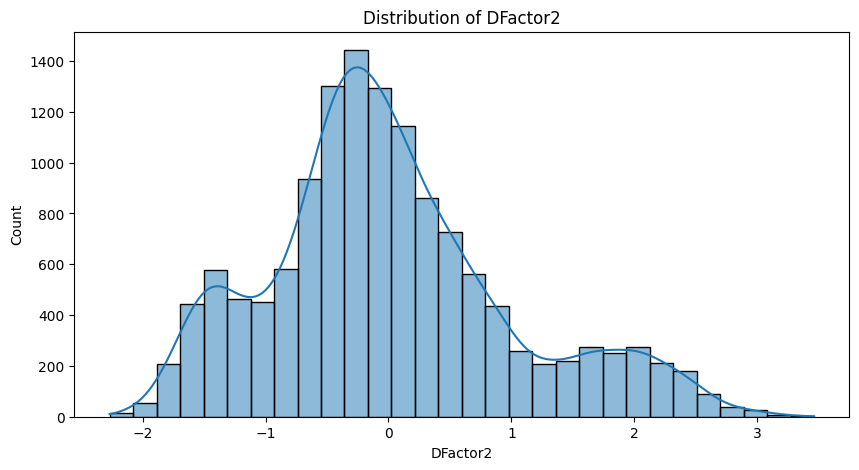

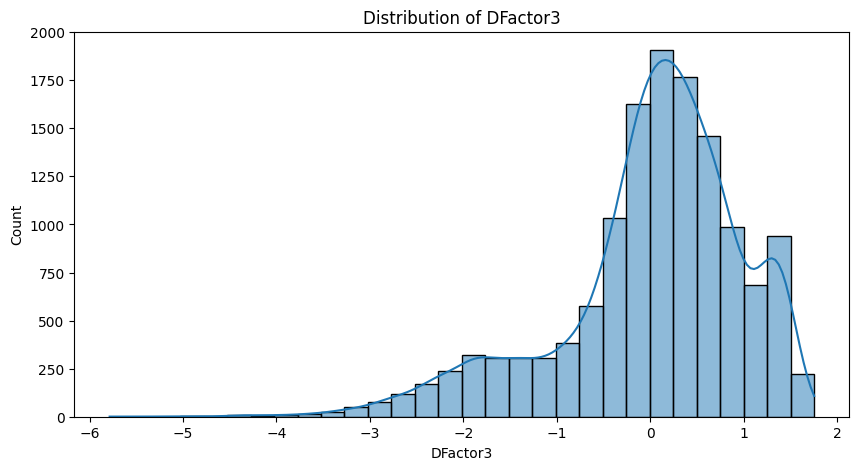

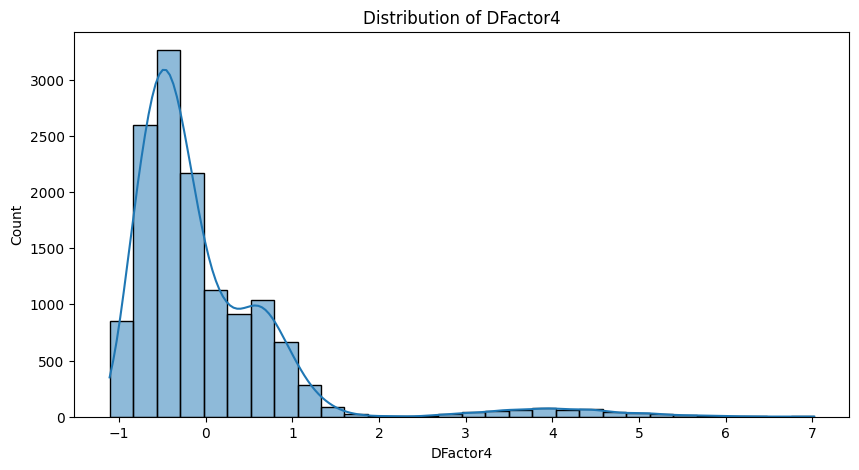

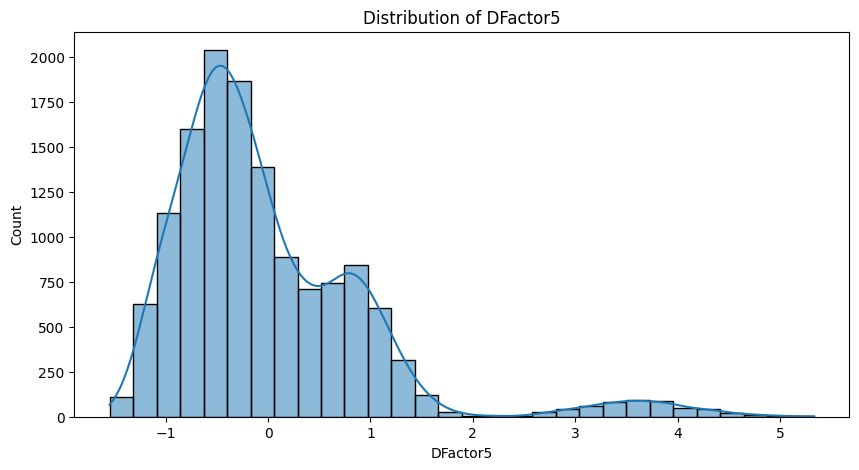

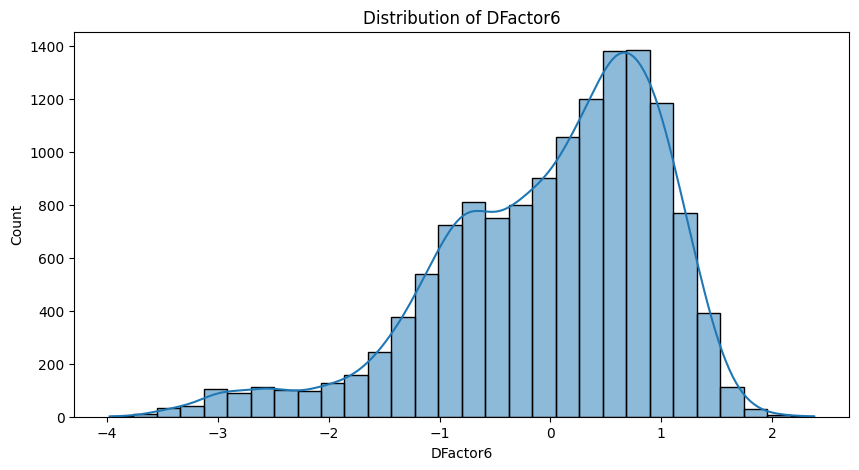

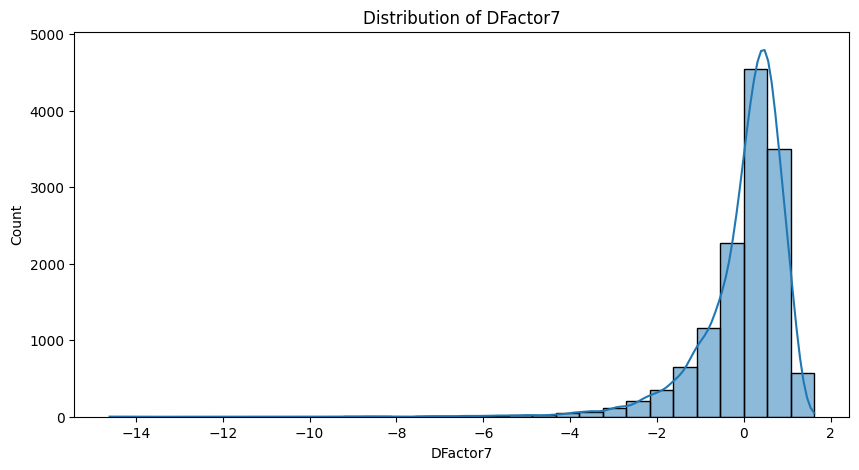

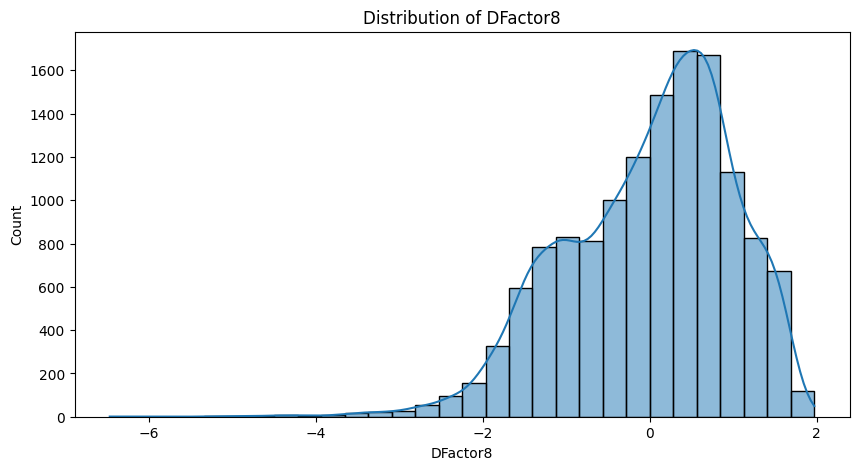

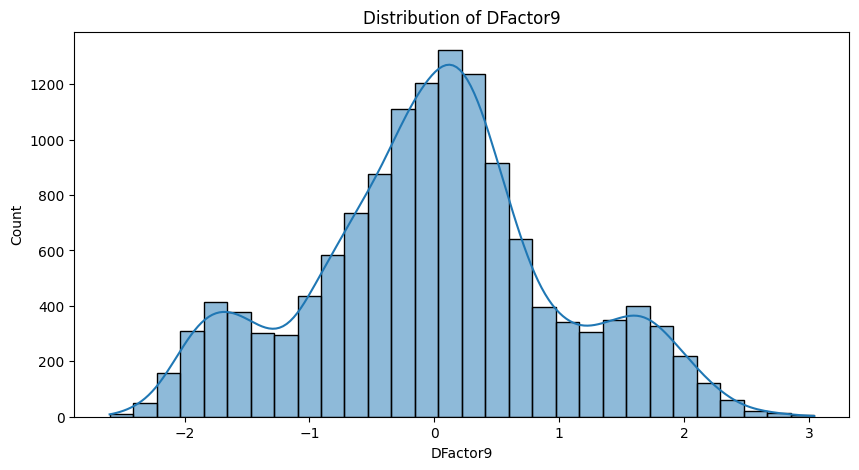

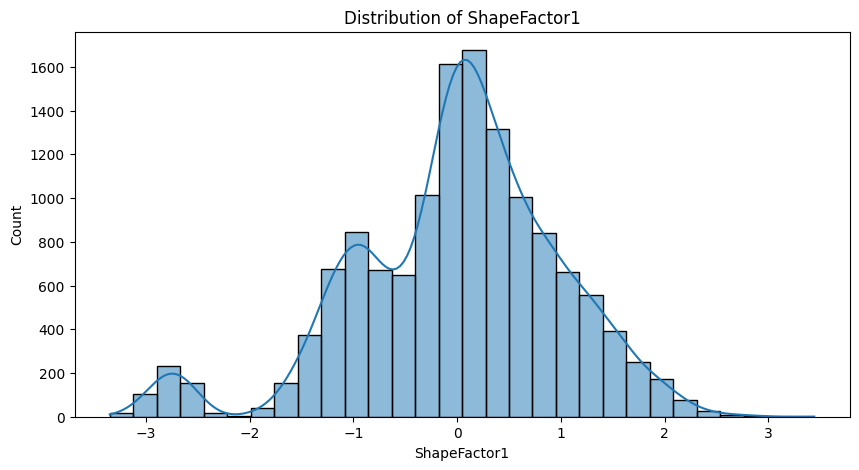

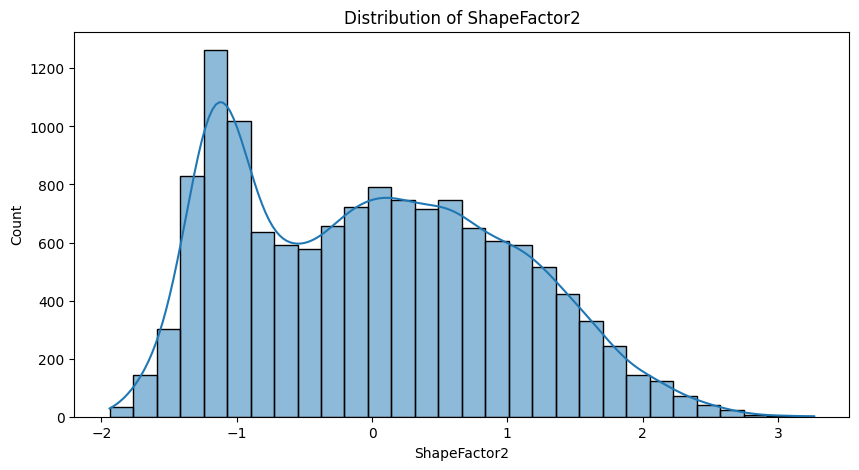

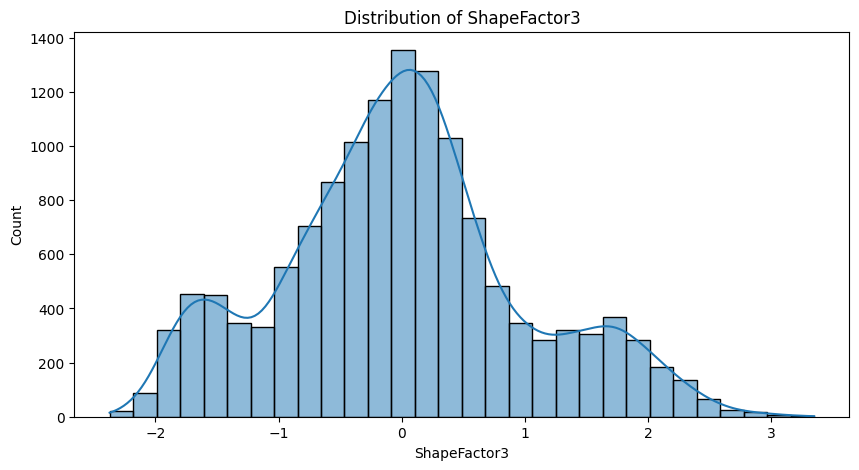

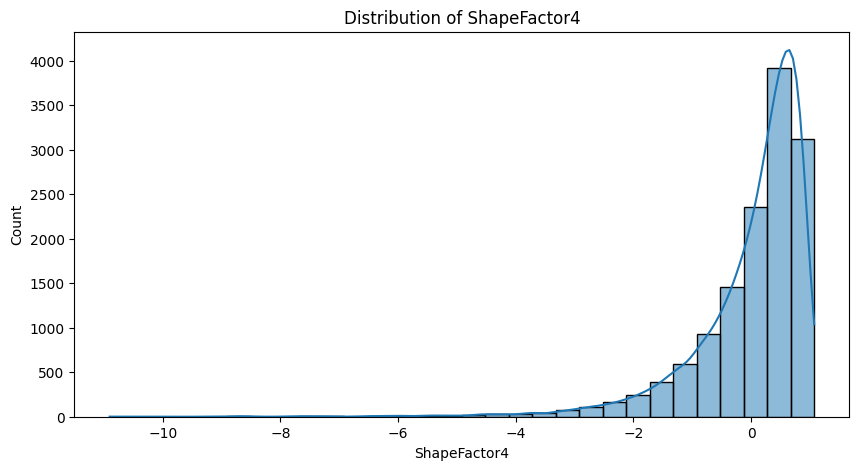

In [7]:
# List of features in the dataset for which we want to visualize the distribution
features = ['Area', 'Perimeter', 'MajorAxisLength', 'DFactor1', 'DFactor2', 'DFactor3', 'DFactor4', 'DFactor5', 'DFactor6', 'DFactor7', 'DFactor8', 'DFactor9', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']

# Looping through each feature to plot its distribution
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


##### 2.2 Visualize the correlation between features:

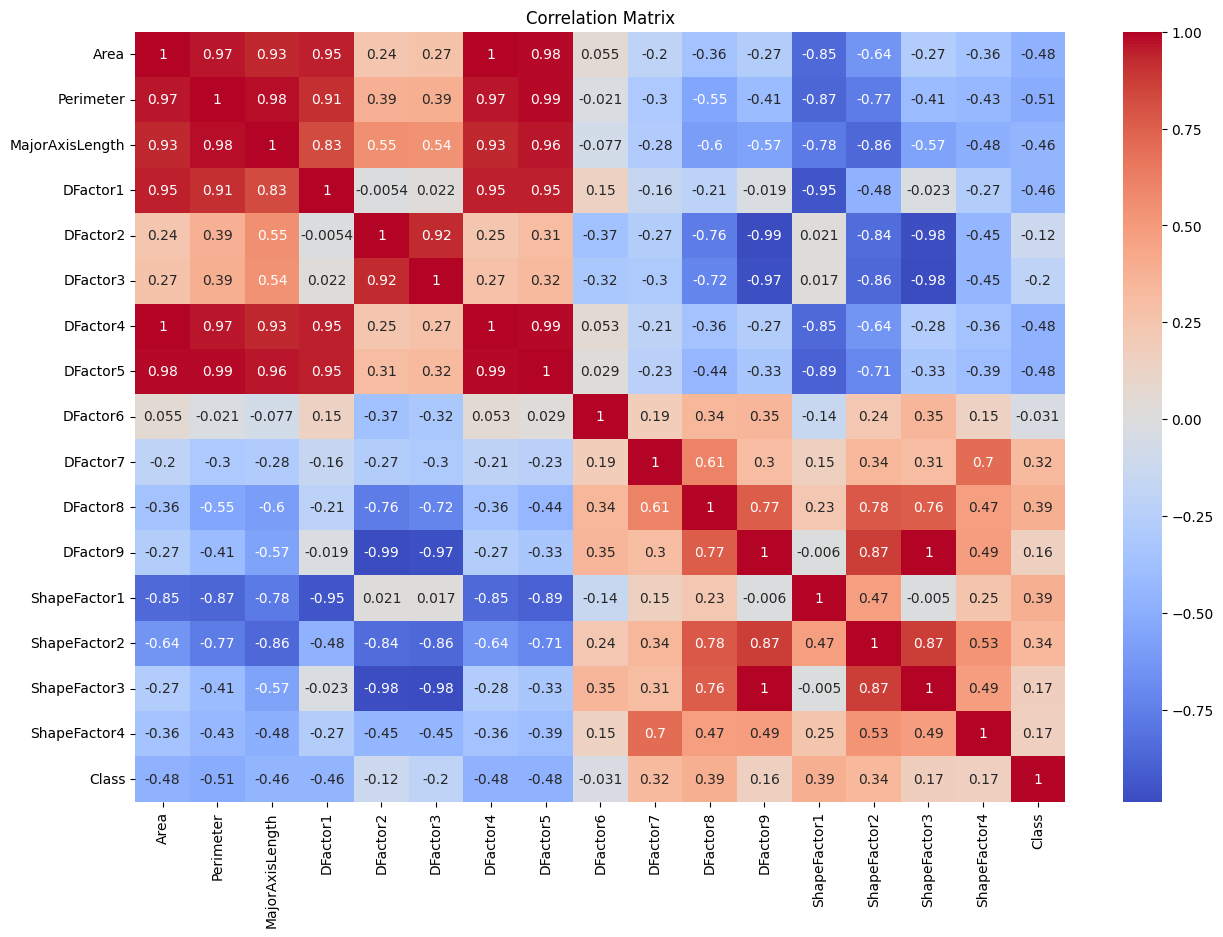

In [8]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### 3. Testing Classification Algorithms:

##### 3.1 Split the data and prepare for modeling:

In [9]:
# Extracting the feature columns by dropping the target column 'Class'
X = data.drop('Class', axis=1)

# Extracting the target column 'Class'
y = data['Class']

# Splitting the dataset into training and testing sets with 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### 3.2 Random Forest Classifier:

In [10]:
# Initializing the Random Forest Classifier with a fixed random state for reproducibility
clf_rf = RandomForestClassifier(random_state=42)

# Training the Random Forest Classifier on the training data
clf_rf.fit(X_train, y_train)

# Predicting the class labels for the test set using the trained Random Forest model
y_pred_rf = clf_rf.predict(X_test)

# Printing the performance metrics for the Random Forest Classifier
print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier:
Accuracy: 92.03%

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       259
           1       1.00      1.00      1.00       114
           2       0.92      0.94      0.93       305
           3       0.91      0.92      0.91       707
           4       0.96      0.95      0.96       376
           5       0.94      0.94      0.94       414
           6       0.88      0.87      0.88       534

    accuracy                           0.92      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709



##### 3.3 Decision Trees:

In [11]:
# Initializing the Decision Tree Classifier with a fixed random state for reproducibility
clf_dt = DecisionTreeClassifier(random_state=42)

# Training the Decision Tree Classifier on the training data
clf_dt.fit(X_train, y_train)

# Predicting the class labels for the test set using the trained Decision Tree model
y_pred_dt = clf_dt.predict(X_test)

# Printing the performance metrics for the Decision Tree Classifier
print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt) * 100:.2f}%") 
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Classifier:
Accuracy: 89.29%

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       259
           1       1.00      1.00      1.00       114
           2       0.92      0.92      0.92       305
           3       0.89      0.88      0.88       707
           4       0.94      0.95      0.94       376
           5       0.91      0.92      0.91       414
           6       0.82      0.82      0.82       534

    accuracy                           0.89      2709
   macro avg       0.91      0.91      0.91      2709
weighted avg       0.89      0.89      0.89      2709



##### 3.4 Support Vector Machines:

In [12]:
# Initializing the Support Vector Machine (SVM) Classifier with a linear kernel and a fixed random state for reproducibility
clf_svm = SVC(kernel='linear', random_state=42)

# Training the SVM Classifier on the training data
clf_svm.fit(X_train, y_train)

# Predicting the class labels for the test set using the trained SVM model
y_pred_svm = clf_svm.predict(X_test)

# Printing the performance metrics for the SVM Classifier
print("Support Vector Machine Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm) * 100:.2f}%")  
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm)) 

Support Vector Machine Classifier:
Accuracy: 92.69%

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       259
           1       1.00      1.00      1.00       114
           2       0.93      0.95      0.94       305
           3       0.92      0.92      0.92       707
           4       0.96      0.95      0.96       376
           5       0.95      0.94      0.95       414
           6       0.87      0.88      0.88       534

    accuracy                           0.93      2709
   macro avg       0.94      0.94      0.94      2709
weighted avg       0.93      0.93      0.93      2709



##### 3.5  k-Nearest Neighbors:

In [13]:
# Initializing the k-Nearest Neighbors (k-NN) Classifier with 5 neighbors
clf_knn = KNeighborsClassifier(n_neighbors=5)

# Training the k-NN Classifier on the training data
clf_knn.fit(X_train, y_train)

# Predicting the class labels for the test set using the trained k-NN model
y_pred_knn = clf_knn.predict(X_test)

# Printing the performance metrics for the k-NN Classifier
print("k-Nearest Neighbors Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn) * 100:.2f}%") 
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn)) 

k-Nearest Neighbors Classifier:
Accuracy: 92.32%

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       259
           1       1.00      1.00      1.00       114
           2       0.91      0.96      0.94       305
           3       0.91      0.92      0.91       707
           4       0.97      0.95      0.96       376
           5       0.95      0.94      0.95       414
           6       0.87      0.87      0.87       534

    accuracy                           0.92      2709
   macro avg       0.94      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709



##### 3.6 Gradient Boosting

In [14]:
# Initializing the Gradient Boosting Classifier with a fixed random state for reproducibility
clf_gb = GradientBoostingClassifier(random_state=42)

# Training the Gradient Boosting Classifier on the training data
clf_gb.fit(X_train, y_train)

# Predicting the class labels for the test set using the trained Gradient Boosting model
y_pred_gb = clf_gb.predict(X_test)

# Printing the performance metrics for the Gradient Boosting Classifier
print("Gradient Boosting Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Classifier:
Accuracy: 92.21%

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       259
           1       1.00      1.00      1.00       114
           2       0.93      0.96      0.94       305
           3       0.91      0.92      0.91       707
           4       0.96      0.95      0.95       376
           5       0.95      0.93      0.94       414
           6       0.87      0.87      0.87       534

    accuracy                           0.92      2709
   macro avg       0.94      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709



#### 4) Comparison

In [15]:
# Dictionary to store results
results = {}

# Store results of each classifier
results['Decision Tree'] = accuracy_score(y_test, y_pred_dt)
results['Random Forest'] = accuracy_score(y_test, y_pred_rf)
results['Support Vector Machine'] = accuracy_score(y_test, y_pred_svm)
results['k-Nearest Neighbors'] = accuracy_score(y_test, y_pred_knn)
results['Gradient Boosting'] = accuracy_score(y_test, y_pred_gb)

# Convert results to DataFrame
results_df = pd.DataFrame(list(results.items()), columns=['Classifier', 'Accuracy'])

# Display results in descending order of accuracy
results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Highlight the best-performing algorithm
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

results_df.style.apply(highlight_max, subset=['Accuracy'])

,Classifier,Accuracy
0,Support Vector Machine,0.926910
1,k-Nearest Neighbors,0.923219
2,Gradient Boosting,0.922111
3,Random Forest,0.920266
4,Decision Tree,0.892949


#### 5). Hyperparameter Tuning for SVM:

In [16]:
# Parameters to search
param_grid_etc = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Using GridSearchCV with ExtraTreesClassifier
grid_search_etc = GridSearchCV(ExtraTreesClassifier(random_state=42), param_grid_etc, cv=2, n_jobs=-1, verbose=2)
grid_search_etc.fit(X_train, y_train)

# Best parameters
print("Best Parameters for ExtraTreesClassifier:", grid_search_etc.best_params_)

# Evaluate with best parameters
y_pred_etc = grid_search_etc.predict(X_test)
print(f"Accuracy with Best Parameters: {accuracy_score(y_test, y_pred_etc) * 100:.2f}%")


Fitting 2 folds for each of 108 candidates, totalling 216 fits
Best Parameters for ExtraTreesClassifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy with Best Parameters: 91.84%


#### 6).  Detailed Evaluation

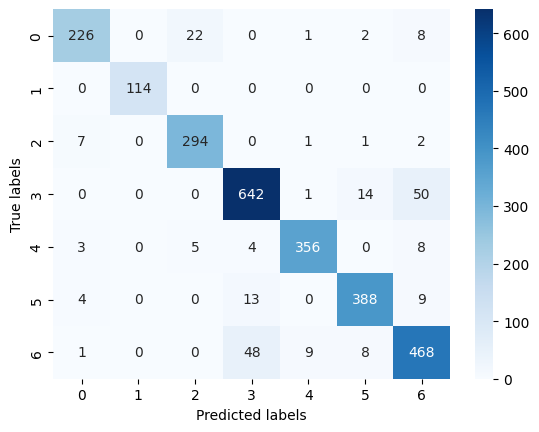

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.90       259
           1       1.00      1.00      1.00       114
           2       0.92      0.96      0.94       305
           3       0.91      0.91      0.91       707
           4       0.97      0.95      0.96       376
           5       0.94      0.94      0.94       414
           6       0.86      0.88      0.87       534

    accuracy                           0.92      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709



In [17]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_etc)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_etc))

#### 7). Save the Model:

In [18]:
# Save the model
joblib.dump(grid_search_etc.best_estimator_, 'best_svm_model.pkl')

['best_svm_model.pkl']